In [7]:
from util.draw_graphs import plot_all, plot_range
"""
reference: https://github.com/amitport/Towards-Federated-Learning-with-Byzantine-Robust-Client-Weighting

we using the experiments code and apply our gamma mean as an aggregator

Author: Cen-Jhih Li
Belongs: Academia Sinica, Institute of Statistical Science, Robust federated learning project
"""
plot_list = ['mean', 'median', 'gamma_mean_0_5', 'geometric_median', 't_mean_10']

Using mean in no_attacks case
final accuracy is 0.8848999738693237
Using mean in random case
final accuracy is 0.5856000185012817
Using median in no_attacks case
final accuracy is 0.8536999821662903
Using median in random case
final accuracy is 0.8605999946594238
Using gamma_mean_0_5 in no_attacks case
final accuracy is 0.8877999782562256
final accuracy is 0.8883000016212463
final accuracy is 0.8691999912261963
final accuracy is 0.8691999912261963
Using gamma_mean_0_5 in random case
final accuracy is 0.890999972820282
final accuracy is 0.891700029373169
final accuracy is 0.7353000044822693
final accuracy is 0.7418000102043152
Using geometric_median in no_attacks case
final accuracy is 0.8737000226974487
Using geometric_median in random case
final accuracy is 0.8741000294685364
Using t_mean_10 in no_attacks case
final accuracy is 0.8881999850273132
Using t_mean_10 in random case
final accuracy is 0.8898000121116638


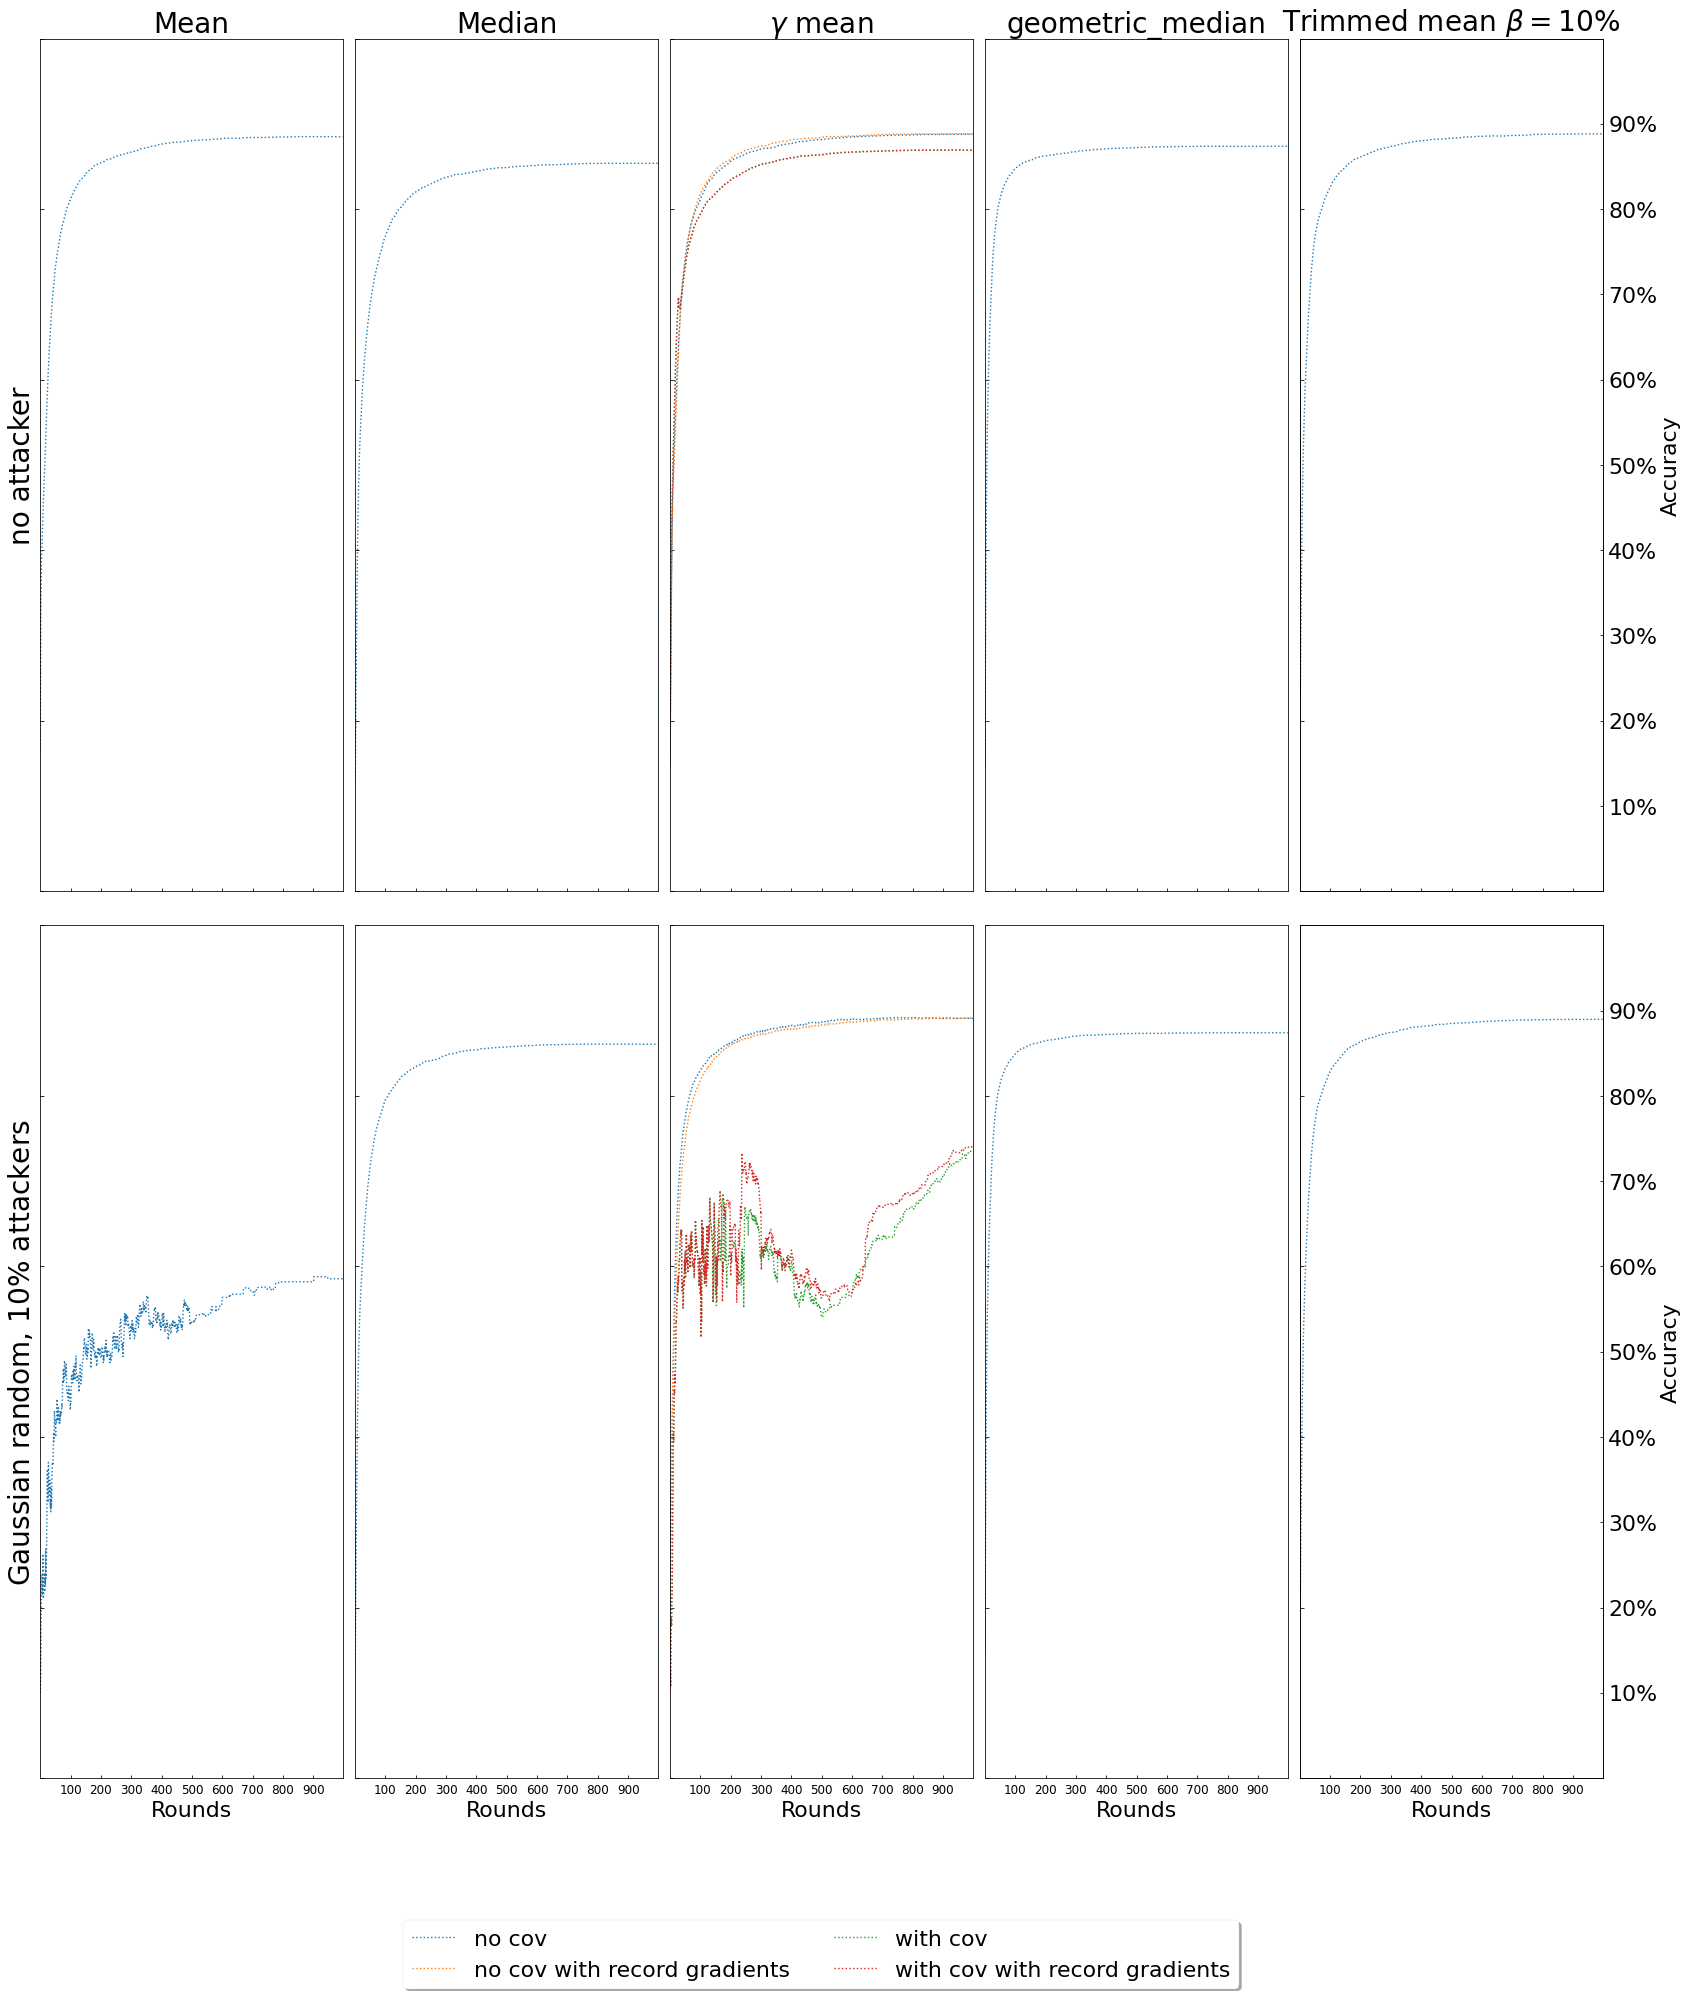

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

SMALL_SIZE = 12
MEDIUM_SIZE = 22
BIGGER_SIZE = 28

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'expr', 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(2, 5, figsize=(28, 32), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs

right_axs = (ax5, ax10)
bottom_axs = (ax6, ax7, ax8, ax9, ax10)

ax1.set_title('Mean')
ax2.set_title('Median')
ax3.set_title(r'$\gamma$ mean')
ax4.set_title('geometric_median')
ax5.set_title(r'Trimmed mean $\beta=10\%$')

ax1.set_ylabel('no attacker')
ax1.set_ylim(0, 1)#(0.85, 1)

ax6.set_ylabel('Gaussian random, $10\%$ attackers')
ax6.set_ylim(0, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=MEDIUM_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=MEDIUM_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(1, 10)])

for i, aggr in enumerate(plot_list):
    attack_type = 'no_attacks'
    if 'gamma_mean' in aggr:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_record_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/record_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    else:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    print("Using {} in {} case".format(aggr,attack_type))
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1)
    attack_type = 'random'
    if 'gamma_mean' in aggr:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_record_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/record_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),
            ]
    else:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),
            ]
    print("Using {} in {} case".format(aggr,attack_type))
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1)

ax8.legend(
           labels=['no cov', 'no cov with record gradients', 'with cov', 'with cov with record gradients'],   # The labels for each line
           loc="lower center",   # Position of legend
#            borderpad=0.5,    # Small spacing around legend box
#            title="gamma mean type",  # Title for the legend
         fontsize=MEDIUM_SIZE,
           bbox_to_anchor=(0.5,-0.26),
           fancybox=True, 
            shadow=True,
           ncol=2
)
for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

#fig.savefig('MLP_attackers_10%.pdf', format='pdf', bbox_inches='tight')

Using mean in no_attacks case
final accuracy is 0.9204000234603882
Using mean in random case
final accuracy is 0.09939999878406525
Using median in no_attacks case
final accuracy is 0.8910999894142151
Using median in random case
final accuracy is 0.8981999754905701
Using gamma_mean_0_5 in no_attacks case
final accuracy is 0.921999990940094
final accuracy is 0.9189000129699707
final accuracy is 0.913100004196167
final accuracy is 0.913100004196167
Using gamma_mean_0_5 in random case
final accuracy is 0.9217000007629395
final accuracy is 0.9221000075340271
final accuracy is 0.8482000231742859
final accuracy is 0.868399977684021
Using geometric_median in no_attacks case
final accuracy is 0.8925999999046326
Using geometric_median in random case
final accuracy is 0.8964999914169312
Using t_mean_10 in no_attacks case
final accuracy is 0.9143000245094299
Using t_mean_10 in random case
final accuracy is 0.9199000000953674


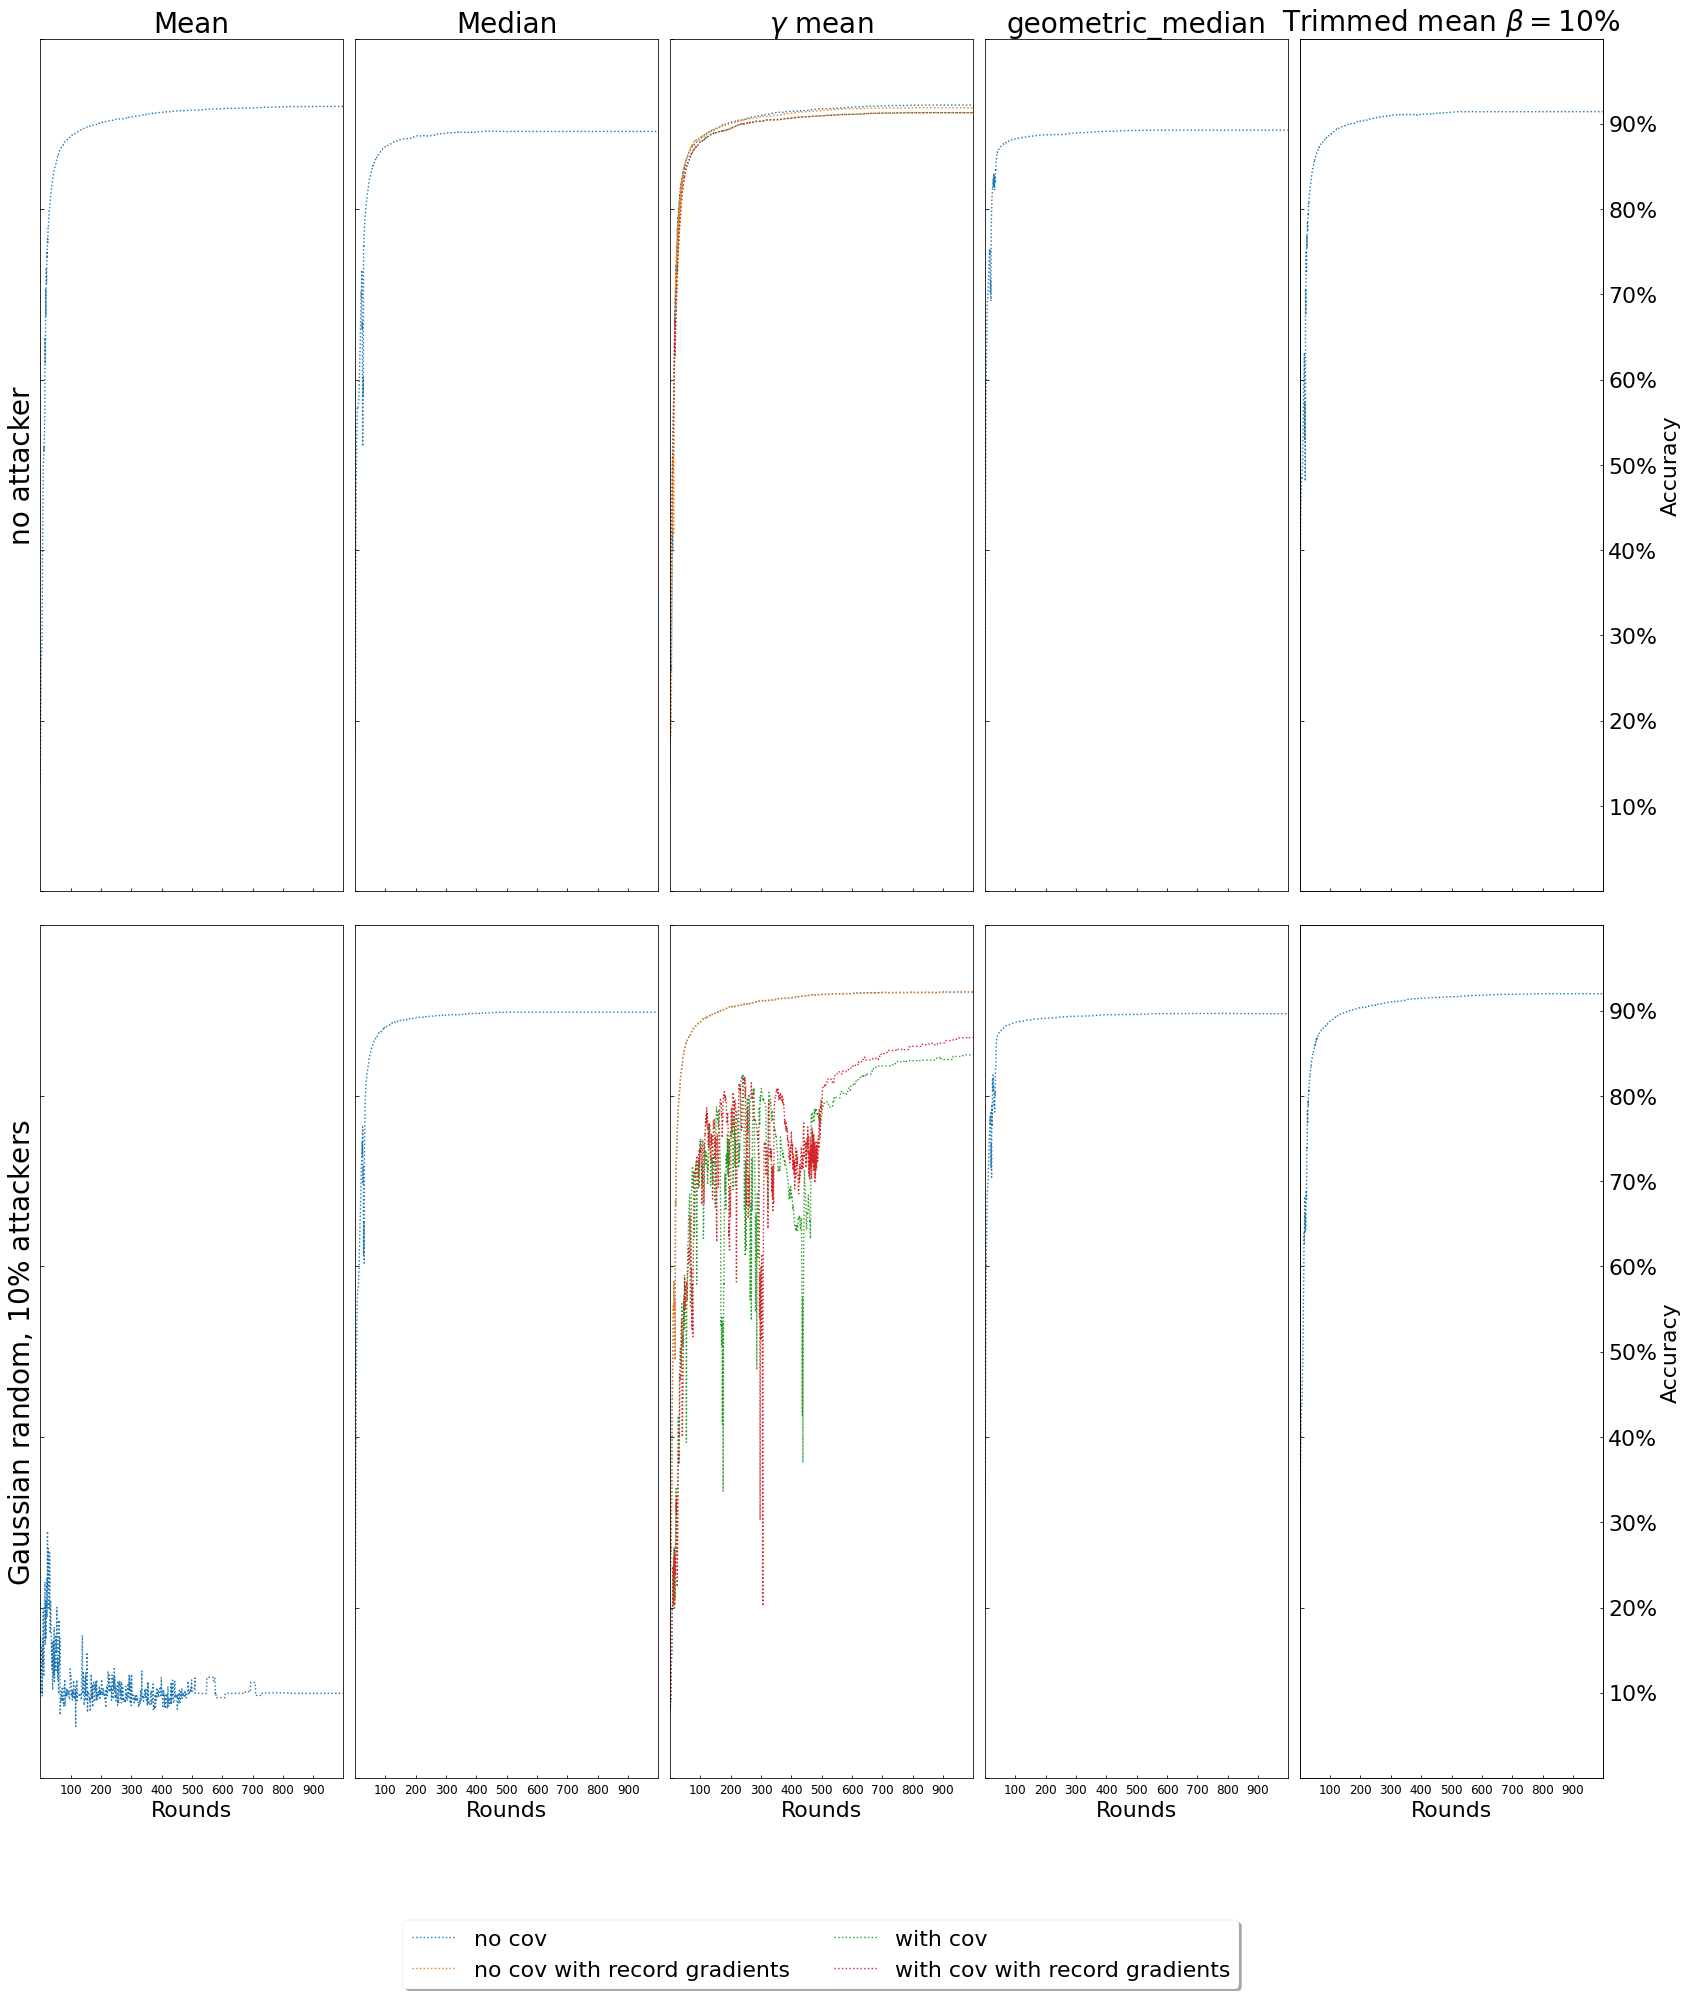

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

SMALL_SIZE = 12
MEDIUM_SIZE = 22
BIGGER_SIZE = 28

plt.rc('font', size=BIGGER_SIZE)           # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)      # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)      # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)      # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)     # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)    # fontsize of the figure title

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'cnn_expr', 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(2, 5, figsize=(28, 32), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs

right_axs = (ax5, ax10)
bottom_axs = (ax6, ax7, ax8, ax9, ax10)

ax1.set_title('Mean')
ax2.set_title('Median')
ax3.set_title(r'$\gamma$ mean')
ax4.set_title('geometric_median')
ax5.set_title(r'Trimmed mean $\beta=10\%$')

ax1.set_ylabel('no attacker')
ax1.set_ylim(0, 1) # (0.85, 1)

ax6.set_ylabel('Gaussian random, $10\%$ attackers')
ax6.set_ylim(0, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=MEDIUM_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=MEDIUM_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(1, 10)])

for i, aggr in enumerate(plot_list):
    attack_type = 'no_attacks'
    if 'gamma_mean' in aggr:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_record_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/record_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    else:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    print("Using {} in {} case".format(aggr,attack_type))
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1)
    attack_type = 'random'
    if 'gamma_mean' in aggr:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_record_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/record_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),
            ]
    else:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),
            ]
    print("Using {} in {} case".format(aggr,attack_type))
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1)

ax8.legend(
           labels=['no cov', 'no cov with record gradients', 'with cov', 'with cov with record gradients'],   # The labels for each line
           loc="lower center",   # Position of legend
#            borderpad=0.5,    # Small spacing around legend box
#            title="gamma mean type",  # Title for the legend
         fontsize=MEDIUM_SIZE,
           bbox_to_anchor=(0.5,-0.26),
           fancybox=True, 
            shadow=True,
           ncol=2
)
for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

#fig.savefig('CNN_attackers_10%.pdf', format='pdf', bbox_inches='tight')